## Shainan Agrawal
### Date: 10/11/2020

### Driver's License - Written Exam Grading 
#### A program to grade the written portion of the driver’s license exam. 
#### The summary report will be printed to a text file DriversExamResults.txt and to the console. The report will contain - 
* the total number of drivers who took the exam 
* the number of drivers who passed the exam
* the number of drivers who did not pass the exam 
* the average number of questions answered correctly and incorrectly  
* minimum and maximum number of questions answered correctly based on all exams taken.

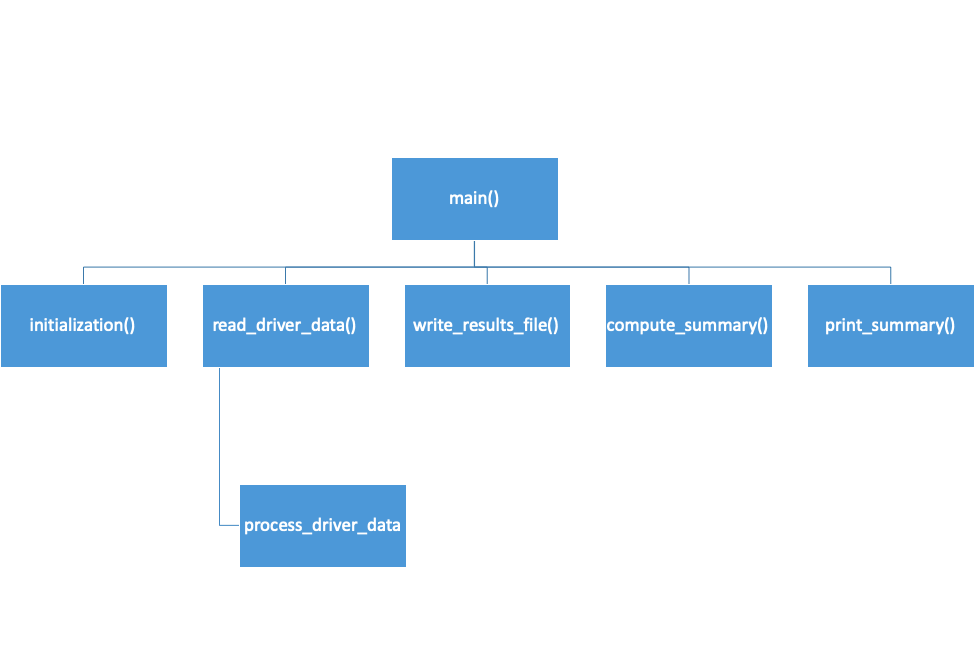

In [1]:
def initialization():
    """A tuple that has correct answers of Driver's license written exam."""
    
    correct_answers = ('A','C','A','A','D','B','C','A','C','B','A','D','C','A','D','C','B','B','D','A')
    return correct_answers

In [2]:
def read_driver_data(correct_answers):
    """Read driver's data from a csv file and store in a list"""
      
    driver_responses = []
    driver_responses_input = open("/Users/shainan/CISFall5357Fall2020/PotentialDrivers.csv", 'r')
    driver_responses_list = driver_responses_input.readlines()
    driver_responses_input.close()
    
    for driver_data in driver_responses_list:
        driver_data = driver_data.rstrip('\n')
        driver_responses.append(driver_data)
    
    #call process_driver_data() function
    graded_drivers_data = process_driver_data(correct_answers, driver_responses)
    
    #return graded_drivers_data
    return graded_drivers_data

In [3]:
def process_driver_data(correct_answers, driver_responses):
    """Check correct answers. 
    Based on passing marks, decide if the driver pass or fail"""

    PASSING_MARKS = 15
    graded_drivers_data = []
    
    for driver_data in driver_responses:
        driver_data_split = driver_data.split(',')
        driver_name = driver_data_split[0]
        driver_score = driver_data_split[1:]

        correct_responses = 0
        incorrect_responses = 0
        
        for each_answer in range(0,len(driver_score)):
            if driver_score[each_answer] == correct_answers[each_answer]:
                correct_responses +=1
            else:
                incorrect_responses +=1
         
        if (correct_responses >= PASSING_MARKS):
            driver_status = 'Pass'
        else:
            driver_status = 'Fail'

        driver_result = (f"{driver_name},{driver_status},{correct_responses},{incorrect_responses}")
        graded_drivers_data.append(driver_result)
        
    return graded_drivers_data
            

In [4]:
def write_results_file (graded_drivers_data, total_potential_drivers, total_passing, total_failing,\
                        average_correct, average_incorrect, min_correct, max_correct):
    """Write Driver's Result to the output fil"""
    
    drivers_output_file = open("/Users/shainan/CISFall5357Fall2020/DriversExamResults.txt", 'w')
    header1 = ["Name\t","Status","Correct","Incorrect"]
    header2 = ["----\t","------","-------","---------"]

    drivers_output_file.write('\t\t'.join(header1) + '\n')
    drivers_output_file.write('\t\t'.join(header2) + '\n')
    
    for driver_data in graded_drivers_data:
        driver_data_split = driver_data.split(',')
        drivers_output_file.write('\t\t'.join(driver_data_split) + '\n')

    summary = (f'------------------------------------------------\n\
Drivers Exam Results Summary :\n\
-----------------------------------------------\n\
Total Number of Drivers taking  Exam\t:\t{total_potential_drivers}\n\
Total Number of Drivers Passing  Exam\t:\t{total_passing}\n\
Total Number of Drivers Failing  Exam\t:\t{total_failing}\n\
Average Number of Correct Answers\t:\t{format(average_correct,".2f")}\n\
Average Number of Incorrect Answers\t:\t{format(average_incorrect,".2f")}\n\
Minimum Number of Correct Answers\t:\t{min_correct}\n\
Maximum Number of Correct Answers\t:\t{max_correct}\n\
------------------------------------------------')

    drivers_output_file.write(summary)  
    drivers_output_file.close()

In [5]:
def compute_summary(graded_drivers_data):
    """Calculate Summary Statistics of the input Driver's data"""
    
    total_drivers = len (graded_drivers_data)
    total_passing = 0
    total_failing = 0
    correct_answers = []
    incorrect_answers = [] 

    for driver_data in graded_drivers_data:
        driver_data_split = driver_data.split(',')
        driver_name = driver_data_split[0]
        driver_status  = driver_data_split[1]
        correct_responses = int(driver_data_split[2])
        incorrect_responses = int(driver_data_split[3])
        incorrect_answers.append(incorrect_responses)
        correct_answers.append(correct_responses)

        if driver_status =='Pass':
            total_passing += 1
        else:
            total_failing +=1
    
    total_correct = sum(correct_answers)
    total_incorrect = sum(incorrect_answers)
    max_correct = max(correct_answers)
    min_correct = min(correct_answers)
    average_correct = total_correct / len(correct_answers)
    average_incorrect = total_incorrect / len(incorrect_answers)
    
    return (total_drivers, total_passing, total_failing, average_correct, average_incorrect, min_correct, max_correct)

In [6]:
def print_summary(total_drivers, total_passing, total_failing, average_correct, average_incorrect, min_correct, max_correct):
    """Print the Summary of Drivers' Written Exam Result"""
    
    print ("----------------------------------------------------")
    print ("Summary of Drivers’ Exam Results ")
    print ("-----------------------------------------------------")
    print ("Total Number of Drivers taking the exam:",total_drivers)
    print ("Total number passing test :\t\t",total_passing)
    print ("Total number failing test :\t\t",total_failing)
    print (F"Average number of correct answers :\t {format(average_correct,'.2f')}")
    print (F"Average number of incorrect answers :  \t{format(average_incorrect,'.2f')}")
    print ("Minimum number of correct answers :\t",min_correct)
    print ("Maximum number of correct answers :\t",max_correct)
    print ("---------------------------------------------------")    
    print ("\nSummary computed successfully!")
    

In [7]:
def main():
    """This is the main driver program that controls the flow of execution"""
    
    #Inputs
    # call initialization()
    correct_answers = initialization()
    # call read_driver_data()
    graded_drivers_data = read_driver_data(correct_answers)
    
    # Process
    # call compute_summary
    total_drivers, total_passing, total_failing, average_correct, average_incorrect,\
        min_correct, max_correct = compute_summary(graded_drivers_data)
    
    # Output
    # call write_results_file()
    write_results_file(graded_drivers_data, total_drivers, total_passing, total_failing,\
                       average_correct, average_incorrect, min_correct, max_correct)
    # call print_summary()
    print_summary(total_drivers, total_passing, total_failing, average_correct,\
                  average_incorrect, min_correct, max_correct)
    print("\nProgram Terminated successfully!")    
    

In [8]:
main()

----------------------------------------------------
Summary of Drivers’ Exam Results 
-----------------------------------------------------
Total Number of Drivers taking the exam: 15
Total number passing test :		 4
Total number failing test :		 11
Average number of correct answers :	 8.47
Average number of incorrect answers :  	11.53
Minimum number of correct answers :	 3
Maximum number of correct answers :	 20
---------------------------------------------------

Summary computed successfully!

Program Terminated successfully!
